<a href="https://colab.research.google.com/github/FlamingoLindo/UMC-Age-of-Empires-2/blob/Branch-Yuzo/C%C3%B3pia_de_ProjetoAOE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
  import pandas as pd
  import numpy as np
  import seaborn as sns
  import matplotlib.pyplot as plt
  from sklearn.model_selection import train_test_split, GridSearchCV
  from sklearn.preprocessing import StandardScaler
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
  from sklearn.inspection import permutation_importance
  from sklearn.preprocessing import OneHotEncoder
  from sklearn.preprocessing import LabelEncoder
  from sklearn.inspection import permutation_importance

In [4]:
  file_path = 'https://raw.githubusercontent.com/FlamingoLindo/UMC-Age-of-Empires-2/main/aoe_data.csv'
  df = pd.read_csv(file_path)

In [5]:
df.head()

,Unnamed: 0,match_id,map,map_size,duration,dataset,difficulty,elo,p1_civ,p2_civ,p1_xpos,p2_xpos,p1_ypos,p2_ypos,winner
0,50453403,50453403,Arabia,Tiny,3445,Definitive Edition,Hardest,1104.0,Vikings,Mayans,92.0,24.0,37.0,78.0,0
1,118982970,118982970,Arena,Tiny,2932,Definitive Edition,Hardest,884.5,Britons,Goths,70.0,82.0,16.0,98.0,0
2,57185801,57185801,Arena,Tiny,2573,Definitive Edition,Hardest,905.5,Chinese,Malians,69.0,61.0,16.0,104.0,0
3,64335748,64335748,Arabia,Tiny,851,Definitive Edition,Hardest,1080.0,Mayans,Magyars,25.0,98.0,80.0,68.0,1
4,116883036,116883036,Arabia,Tiny,4737,Definitive Edition,Hardest,1050.0,Berbers,Slavs,83.0,30.0,28.0,85.0,1


In [6]:
 df.dropna(inplace=True)
 df.isna().sum()

,0
Unnamed: 0,0
match_id,0
map,0
map_size,0
duration,0
dataset,0
difficulty,0
elo,0
p1_civ,0
p2_civ,0


In [7]:
df["map"].unique().size #CONTAR QUANTOS MAPAS DIFERENTES EXISTEM

40

In [8]:
mapas = df["map"].unique()

In [9]:
print(mapas)

['Arabia' 'Arena' 'Four Lakes' 'Golden Pit' 'Serengeti' 'MegaRandom'
 'Coastal Forest' 'Atacama' 'Acropolis' 'Golden Swamp' 'Gold Rush'
 'Aftermath' 'Socotra' 'Hideout' 'Valley' 'Mongolia' 'Ghost Lake' 'Baltic'
 'Marketplace' 'Archipelago' 'Runestones' 'Islands' 'Crater'
 'Mediterranean' 'Migration' 'Team Islands' 'Wade' 'Land Madness'
 'Lowland' 'Fortress' 'Seize the Mountain' 'Greenland' 'Lombardia'
 'Hill Fort' 'Haboob' 'Volcanic Island' 'Yucatan' 'Cenotes' 'Coastal'
 'Northern Isles']


In [10]:
dfnumpy = df.to_numpy()

In [11]:
array = [] #Criar um novo dataframe com 10 itens de cada mapa

for item in mapas:
  i = 0
  for linha in dfnumpy:
    if linha[2] == item:
      array.append(linha)
      i += 1
      if i == 10:
        break


In [12]:
for mapa in mapas:
  count = 0
  for item in array:
    if item[2] == mapa:
      count += 1
  print(f"{mapa} = {count}")

Arabia = 10
Arena = 10
Four Lakes = 10
Golden Pit = 10
Serengeti = 10
MegaRandom = 10
Coastal Forest = 10
Atacama = 10
Acropolis = 10
Golden Swamp = 10
Gold Rush = 10
Aftermath = 10
Socotra = 10
Hideout = 10
Valley = 10
Mongolia = 10
Ghost Lake = 10
Baltic = 10
Marketplace = 10
Archipelago = 10
Runestones = 10
Islands = 10
Crater = 10
Mediterranean = 10
Migration = 10
Team Islands = 10
Wade = 10
Land Madness = 10
Lowland = 10
Fortress = 10
Seize the Mountain = 10
Greenland = 10
Lombardia = 10
Hill Fort = 10
Haboob = 10
Volcanic Island = 10
Yucatan = 10
Cenotes = 10
Coastal = 4
Northern Isles = 10


In [13]:
newdf = pd.DataFrame(array) #novo dataframe

In [14]:
print(newdf)

            0          1               2     3     4                   5   \
0     50453403   50453403          Arabia  Tiny  3445  Definitive Edition   
1     64335748   64335748          Arabia  Tiny   851  Definitive Edition   
2    116883036  116883036          Arabia  Tiny  4737  Definitive Edition   
3    125287851  125287851          Arabia  Tiny  2899  Definitive Edition   
4    107928939  107928939          Arabia  Tiny  1824  Definitive Edition   
..         ...        ...             ...   ...   ...                 ...   
389  130621787  130621787  Northern Isles  Tiny  2701  Definitive Edition   
390  129098782  129098782  Northern Isles  Tiny  2430  Definitive Edition   
391  130338190  130338190  Northern Isles  Tiny  1155  Definitive Edition   
392  129509720  129509720  Northern Isles  Tiny  1579  Definitive Edition   
393  130935747  130935747  Northern Isles  Tiny   228  Definitive Edition   

          6       7           8         9      10    11    12    13  14  
0

In [15]:
newdf.drop([0,1,3,5,6], axis=1, inplace=True)

In [16]:
print(newdf)

                 2     4       7           8         9      10    11    12  \
0            Arabia  3445  1104.0     Vikings    Mayans   92.0  24.0  37.0   
1            Arabia   851  1080.0      Mayans   Magyars   25.0  98.0  80.0   
2            Arabia  4737  1050.0     Berbers     Slavs   83.0  30.0  28.0   
3            Arabia  2899  1672.5     Vikings    Mayans  101.0  16.0  58.0   
4            Arabia  1824  1135.0     Chinese  Japanese   46.0  84.0  97.0   
..              ...   ...     ...         ...       ...    ...   ...   ...   
389  Northern Isles  2701   923.0      Cumans   Vikings   50.0  62.0  96.0   
390  Northern Isles  2430   970.0     Vikings  Italians   28.0  53.0  81.0   
391  Northern Isles  1155  1255.0    Italians  Persians   97.0  23.0  56.0   
392  Northern Isles  1579  1641.5     Mongols     Khmer   44.0  63.0  94.0   
393  Northern Isles   228   796.0  Byzantines     Slavs   58.0  35.0  97.0   

       13  14  
0    78.0   0  
1    68.0   1  
2    85.0   1  

In [17]:
categmapa = newdf[2].to_numpy()

categmapa2 = []
for item in categmapa:
  array = []
  array.append(item)
  categmapa2.append(array)


onehot_encoder = OneHotEncoder(sparse_output=False)

# Convertendo os dados categóricos em numéricos (matriz densa)
numeric_data = onehot_encoder.fit_transform(categmapa2)

mapdf = pd.DataFrame(numeric_data)
print(mapdf)




      0    1    2    3    4    5    6    7    8    9   ...   30   31   32  \
0    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
389  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
390  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
391  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
392  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
393  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   

      33   34   35   36   37   38   39  
0    0.0  0.0  0.0  0.0  0.0  0.0 

In [18]:
categciv = newdf[8].to_numpy()

categciv2 = []
for item in categciv:
  array = []
  array.append(item)
  categciv2.append(array)


onehot_encoder = OneHotEncoder(sparse_output=False)

# Convertendo os dados categóricos em numéricos (matriz densa)
numeric_data2 = onehot_encoder.fit_transform(categciv2)

civdf = pd.DataFrame(numeric_data2)
print(civdf)

      0    1    2    3    4    5    6    7    8    9   ...   29   30   31  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
389  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
390  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
391  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
392  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
393  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   

      32   33   34   35   36   37   38  
0    0.0  0.0  0.0  0.0  0.0  0.0 

In [19]:
categcivv = newdf[9].to_numpy()

categcivv2 = []
for item in categcivv:
  array = []
  array.append(item)
  categcivv2.append(array)


onehot_encoder = OneHotEncoder(sparse_output=False)

# Convertendo os dados categóricos em numéricos (matriz densa)
numeric_data3 = onehot_encoder.fit_transform(categcivv2)

civdf2 = pd.DataFrame(numeric_data3)
print(civdf2)

      0    1    2    3    4    5    6    7    8    9   ...   28   29   30  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
389  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
390  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
391  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
392  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
393  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

      31   32   33   34   35   36   37  
0    0.0  0.0  0.0  0.0  0.0  0.0 

In [20]:
finaldf = pd.concat([newdf, civdf2, civdf, mapdf], axis=1)
finaldf.head()

,2,4,7,8,9,10,11,12,13,14,...,30,31,32,33,34,35,36,37,38,39
0,Arabia,3445,1104.0,Vikings,Mayans,92.0,24.0,37.0,78.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Arabia,851,1080.0,Mayans,Magyars,25.0,98.0,80.0,68.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arabia,4737,1050.0,Berbers,Slavs,83.0,30.0,28.0,85.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arabia,2899,1672.5,Vikings,Mayans,101.0,16.0,58.0,56.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Arabia,1824,1135.0,Chinese,Japanese,46.0,84.0,97.0,28.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
finaldf.drop([2, 8, 9], axis=1, inplace=True)

In [22]:
finaldf.head()

,4,7,10,11,12,13,14,0,1,3,...,30,31,32,33,34,35,36,37,38,39
0,3445,1104.0,92.0,24.0,37.0,78.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,851,1080.0,25.0,98.0,80.0,68.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4737,1050.0,83.0,30.0,28.0,85.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2899,1672.5,101.0,16.0,58.0,56.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1824,1135.0,46.0,84.0,97.0,28.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
arraycolumn = []
for i in range(0,115):
  arraycolumn.append(i)

finaldf.columns = arraycolumn


In [32]:
print(finaldf)

      0       1      2     3     4     5    6    7    8    9    ...  105  106  \
0    3445  1104.0   92.0  24.0  37.0  78.0    0  0.0  0.0  0.0  ...  0.0  0.0   
1     851  1080.0   25.0  98.0  80.0  68.0    1  0.0  0.0  0.0  ...  0.0  0.0   
2    4737  1050.0   83.0  30.0  28.0  85.0    1  0.0  0.0  0.0  ...  0.0  0.0   
3    2899  1672.5  101.0  16.0  58.0  56.0    0  0.0  0.0  0.0  ...  0.0  0.0   
4    1824  1135.0   46.0  84.0  97.0  28.0    1  0.0  0.0  0.0  ...  0.0  0.0   
..    ...     ...    ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
389  2701   923.0   50.0  62.0  96.0  22.0    1  0.0  0.0  0.0  ...  1.0  0.0   
390  2430   970.0   28.0  53.0  81.0  22.0    1  0.0  0.0  0.0  ...  1.0  0.0   
391  1155  1255.0   97.0  23.0  56.0  51.0    1  0.0  0.0  0.0  ...  1.0  0.0   
392  1579  1641.5   44.0  63.0  94.0  22.0    1  0.0  0.0  0.0  ...  1.0  0.0   
393   228   796.0   58.0  35.0  97.0  30.0    0  0.0  0.0  0.0  ...  1.0  0.0   

     107  108  109  110  11

In [33]:
X = finaldf.drop(6, axis=1)
y = finaldf[6]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
print(y)

0      0
1      1
2      1
3      0
4      1
      ..
389    1
390    1
391    1
392    1
393    0
Name: 6, Length: 394, dtype: int64


In [35]:
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

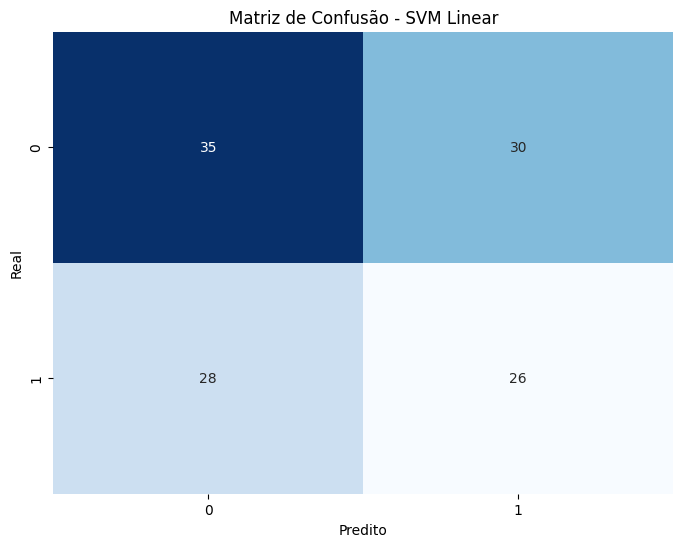

              precision    recall  f1-score   support

           0       0.56      0.54      0.55        65
           1       0.46      0.48      0.47        54

    accuracy                           0.51       119
   macro avg       0.51      0.51      0.51       119
weighted avg       0.51      0.51      0.51       119



In [36]:
y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - SVM Linear')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()
print(classification_report(y_test, y_pred))

In [37]:
# Definir os parâmetros para o GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Instanciar o modelo SVM
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [38]:
# Exibir os melhores parâmetros
print('Melhores parâmetros: ', grid.best_params_)
print('Melhor estimador: ', grid.best_estimator_)

Melhores parâmetros:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Melhor estimador:  SVC(C=10, gamma=0.01)


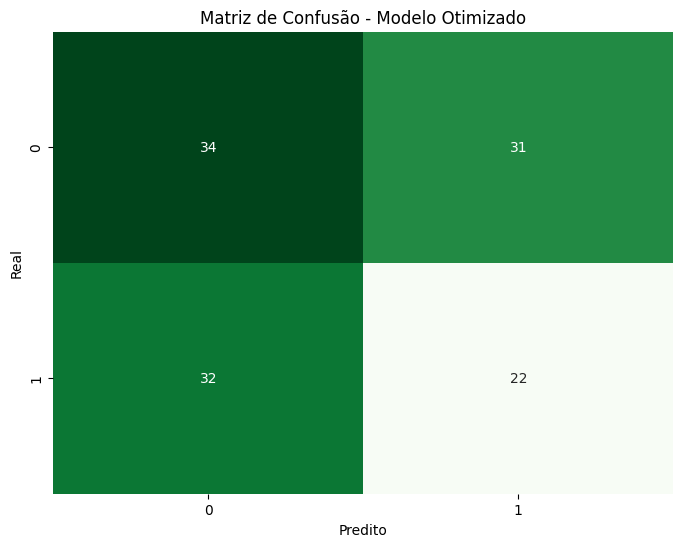

              precision    recall  f1-score   support

           0       0.52      0.52      0.52        65
           1       0.42      0.41      0.41        54

    accuracy                           0.47       119
   macro avg       0.47      0.47      0.47       119
weighted avg       0.47      0.47      0.47       119



In [39]:
# Previsões com o modelo otimizado
grid_predictions = grid.predict(X_test_scaled)

# Matriz de confusão e relatório de classificação
conf_matrix_grid = confusion_matrix(y_test, grid_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_grid, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Matriz de Confusão - Modelo Otimizado')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()
print(classification_report(y_test, grid_predictions))